# Object-oriented programming

You've heard that Python is _objected-oriented_, but haven't found a reason to use an object yourself. Here we'll develop an example where designing an object makes life easier. 

Let's say you've got a series of 1000 light curves, each of which contain: 
* times
* fluxes
* uncertainties
* flags

Instead of managing a bunch of arrays to handle these values, we could instead create an object to store light curves. 

## Defining a new object

To create a new object, you use the `class` command, rather than the `def` command that you would use for functions,
```python
class LightCurve(object):
```
We've named the new object LightCurve - object names in python should be uppercase without underscores separating words (whereas functions are usually all lowercase and words are separated by underscores). The `object` in parentheses is the class that `LightCurve` inherits from. 


### The `__init__` method
Now we will define how you call the `LightCurve` constructor (the call that creates new `LightCurve` objects). Let's say you want to be able to create a light curve like this...
```python
new_light_curve = LightCurve(times=times, fluxes=fluxes, 
                             uncertainties=uncertainties, flags=flags)
```
All Python objects get initialized with a function called `__init__` defined within the class, like this: 
```python
class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None):
```
You define the `__init__` function like all other functions, except that the first argument is always called `self`. This `self` is the shorthand variable that you use to refer to the `LightCurve` object within the `__init__` method.

### Attributes
Objects have _attributes_, which are like variables stored on an object. We'll want to store the values above into the `LightCurve` object, each with their own attribute, like this: 
```python
class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        
```
Each attribute is defined by setting `self.<attribute name> = <value>`. All attributes should be defined within the `__init__` method. 

## Example
Let's now create an instance of the `LightCurve` object, and see how it works: 

In [18]:
import numpy as np

# Define the object: 

class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
        
# Create some fake data:
times = np.linspace(0, 10, 100)
sigma = 0.1
fluxes = 1 + sigma * np.random.randn(len(times))
uncertainties = sigma * np.ones_like(fluxes)
flags = np.random.randint(0, 5, len(fluxes))
name = 'proxima Centauri'

# Initialize a LightCurve object:
prox_cen = LightCurve(times=times, fluxes=fluxes, 
                      uncertainties=uncertainties, flags=flags,
                      name=name)

We can see what values are stored in each attribute like this: 

In [19]:
prox_cen.times

array([  0.        ,   0.1010101 ,   0.2020202 ,   0.3030303 ,
         0.4040404 ,   0.50505051,   0.60606061,   0.70707071,
         0.80808081,   0.90909091,   1.01010101,   1.11111111,
         1.21212121,   1.31313131,   1.41414141,   1.51515152,
         1.61616162,   1.71717172,   1.81818182,   1.91919192,
         2.02020202,   2.12121212,   2.22222222,   2.32323232,
         2.42424242,   2.52525253,   2.62626263,   2.72727273,
         2.82828283,   2.92929293,   3.03030303,   3.13131313,
         3.23232323,   3.33333333,   3.43434343,   3.53535354,
         3.63636364,   3.73737374,   3.83838384,   3.93939394,
         4.04040404,   4.14141414,   4.24242424,   4.34343434,
         4.44444444,   4.54545455,   4.64646465,   4.74747475,
         4.84848485,   4.94949495,   5.05050505,   5.15151515,
         5.25252525,   5.35353535,   5.45454545,   5.55555556,
         5.65656566,   5.75757576,   5.85858586,   5.95959596,
         6.06060606,   6.16161616,   6.26262626,   6.36

So far this just looks like another way to store your data. It becomes more powerful when you write _methods_ for your object. Let's make a simple plotting method for the `LightCurve` object, which plots the light curve.

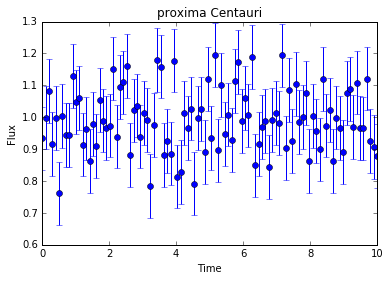

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt 

class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
            
    def plot(self):
        """Plot the light curve"""
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='o')
        plt.xlabel('Time')
        plt.ylabel('Flux')
        plt.title(self.name)

# Initialize a LightCurve object:
prox_cen = LightCurve(times=times, fluxes=fluxes, 
                      uncertainties=uncertainties, flags=flags,
                      name=name)

prox_cen.plot()

Note that you can access the attributes of the object within methods by calling `self.<attribute name>`.

### Class methods

There's more than one way to initialize a light curve. Maybe your light curves come to you in a particular file type, and you want to be able to load those files directly into a light curve object. You could do that with a _class method_, like this:

In [21]:
class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
            
    def plot(self):
        """Plot the light curve"""
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='o')
        plt.xlabel('Time')
        plt.ylabel('Flux')
        plt.title(self.name)

    @classmethod
    def from_txt(cls, path):
        data = np.loadtxt(path)
        
        times = data[0, :]
        fluxes = data[1, :]
        uncertainties = data[2, :]
        flags = data[3, :]
        return cls(times=times, fluxes=fluxes, 
                   uncertainties=uncertainties, flags=flags)

To get sample light curves to load using the new class method, run the script `generate_lcs.py` from the command line, or with the cell below:

In [27]:
%%bash
python generate_lcs.py

We can now load a light curve with the class method like this: 

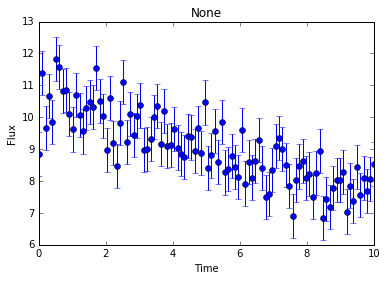

In [28]:
path = 'sample_lcs/lc_0.txt'

lc0 = LightCurve.from_txt(path)

lc0.plot()

Now let's compute the mean flux of each target, taking advantage of the object we've created: 

In [32]:
from glob import glob

# Here are the paths to the light curves:
lc_paths = glob('sample_lcs/*.txt')

# let's load all of the light curves with a generator: 
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]

for lightcurve in lightcurves:
    print(lightcurve.fluxes.mean())

9.06524832338
9.73904853214
10.1118489817
8.44045847714
11.6496252613
11.077794445
11.4169890354
11.0546153824
10.1510167103
10.003119207


And let's plot each light curve:

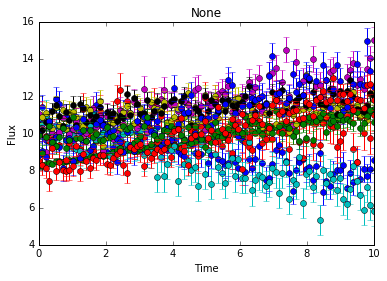

In [34]:
for lightcurve in lightcurves:
    lightcurve.plot()

### A more useful method

Let's "clean" the light curves by normalizing out a polynomial trend from each one. We'll do this with a new method. 

In [35]:
class LightCurve(object):
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
        
        self.cleaned = False
    
    def plot(self):
        """Plot the light curve"""
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='o')
        plt.xlabel('Time')
        plt.ylabel('Flux')
        plt.title(self.name)

    @classmethod
    def from_txt(cls, path):
        data = np.loadtxt(path)
        
        times = data[0, :]
        fluxes = data[1, :]
        uncertainties = data[2, :]
        flags = data[3, :]
        return cls(times=times, fluxes=fluxes, 
                   uncertainties=uncertainties, flags=flags)
    
    def clean(self, order=1):
        # Fit a polynomial trend to the light curve: 
        poly_params = np.polyfit(self.times, self.fluxes, order)
        best_fit_model = np.polyval(poly_params, self.times)
        
        # Now normalize each flux by the flux in the best-fit polynomial model
        self.fluxes /= best_fit_model
        self.uncertainties /= best_fit_model
        
        # Change the "cleaned" attribute to True: 
        self.cleaned = True

Let's try it on our data:

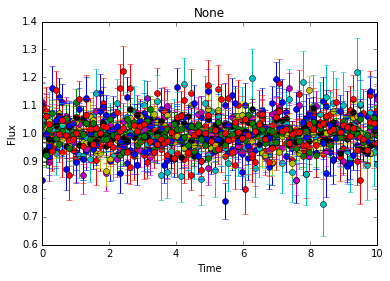

In [37]:
from glob import glob

# Here are the paths to the light curves:
lc_paths = glob('sample_lcs/*.txt')

# let's load all of the light curves with a generator: 
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]

for lightcurve in lightcurves:
    lightcurve.clean()
    
    lightcurve.plot()

You can now check to see if a light curve has been cleaned with the cleaned attribute: 

In [38]:
lightcurves[0].cleaned

True

## Documentation

If you want to share your code with collaborators or with your future self, you should include documentation. We've neglected that above, so let's add in some _docstrings_!

There's a top-level docstring for the object, then docstrings for each method on the class. The format of the docstrings below is called [numpydoc](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt).

In [39]:
class LightCurve(object):
    """Container for astrophysical light curves"""
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name=None):
        """
        Parameters
        ----------
        times : array-like
            Time of each flux measurement
        fluxes : array-like
            Fluxes at each time
        uncertainties : array-like
            Uncertainties of each flux measurement
        flags : array-like
            Data quality flags for each flux
        name : string
            Name of the target
        """
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name
        
        self.cleaned = False
    
    def plot(self):
        """
        Plot the light curve.
        """
        plt.errorbar(self.times, self.fluxes, self.uncertainties, fmt='o')
        plt.xlabel('Time')
        plt.ylabel('Flux')
        plt.title(self.name)

    @classmethod
    def from_txt(cls, path):
        """
        Load a light curve from a raw text file.
        
        Parameters
        ----------
        path : str 
            Path to the light curve text file
        """
        data = np.loadtxt(path)
        
        times = data[0, :]
        fluxes = data[1, :]
        uncertainties = data[2, :]
        flags = data[3, :]
        return cls(times=times, fluxes=fluxes, 
                   uncertainties=uncertainties, flags=flags)
    
    def clean(self, order=1):
        """
        Normalize the light curve by a polynomial.
        
        Parameters
        ----------
        order : int
            Polynomial order
        """
        # Fit a polynomial trend to the light curve: 
        poly_params = np.polyfit(self.times, self.fluxes, order)
        best_fit_model = np.polyval(poly_params, self.times)
        
        # Now normalize each flux by the flux in the best-fit polynomial model
        self.fluxes /= best_fit_model
        self.uncertainties /= best_fit_model
        
        # Change the "cleaned" attribute to True: 
        self.cleaned = True
        
# Initialize a LightCurve object:
prox_cen = LightCurve(times=times, fluxes=fluxes, 
                      uncertainties=uncertainties, flags=flags,
                      name=name)

Now you can see the documentation on the module within iPython or iPython Notebooks by typing
```
prox_cen?
```
...you can see the documentation for each method by typing
```
prox_cen.clean?
```
and you can see the source code for each method by typing:
```
prox_cen.clean??
```

In [40]:
prox_cen?

If you write your docstrings in this format, there are packages that can generate HTML documentation straight from the source code. For example, astropy's `SkyCoord` object has [this docstring in the source](https://github.com/astropy/astropy/blob/master/astropy/coordinates/sky_coordinate.py#L84-L182) which becomes [this webpage](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html).

You can even get free web hosting for your documentation and automatic integration with GitHub via [Read The Docs](https://readthedocs.org). 

## Exercise

The above example is relevant to my research interests, but you might have a very different idea about what objects you'd like to create for your work.

In the cell below, start designing an object that you could use in your day-to-day work – replace the placeholder text down there as you see fit. I don't anticipate that you'll "finish" developing this object in the short time that we have, but use this time to take advantage of the instructors and your peers in the room to ask for feedback/help in designing your object. Experiment, and run with your ideas!

In [2]:
class MyObject(object):
    """Don't forget to write docstrings!"""
    def __init__(arg1):
        self.arg1 = arg1